# Unit 5 - Financial Planning

In [26]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from urllib import response
import json
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

# Setup Alpaca environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3
monthly_income = 12000

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
response = requests.get(btc_url)
data_btc = response.json()

print("Your total bitcoin holdings are valued at", data_btc['data']['1']['quotes']['USD']['price']*my_btc )

# Fetch current ETH price
response = requests.get(eth_url)
data_eth = response.json()

print("Your total Etherium holdings are valued at", data_eth['data']['1027']['quotes']['USD']['price']*my_eth )

Your total bitcoin holdings are valued at 24498.0
Your total Etherium holdings are valued at 8282.681


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret

    # ^ Pre-setup above

# Create the Alpaca API object

    #  ^ Pre-setup above

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2022-01-01", tz="America/Denver").isoformat()
end_date = pd.Timestamp("2022-10-28", tz="America/Denver").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
ticker_df = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
AGG = ticker_df[ticker_df['symbol']=="AGG"].drop('symbol', axis=1)
SPY = ticker_df[ticker_df['symbol']=="SPY"].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
ticker_df = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Preview DataFrame
ticker_df.tail()

AGG                                               \
                            open     high    low  close    volume trade_count   
timestamp                                                                       
2022-10-24 04:00:00+00:00  93.77  94.0300  93.45  93.64   5898426       20905   
2022-10-25 04:00:00+00:00  94.39  94.7050  94.36  94.56  11361895       35359   
2022-10-26 04:00:00+00:00  94.78  95.1700  94.76  94.98   7836932       26772   
2022-10-27 04:00:00+00:00  95.21  95.6204  94.99  95.46   6874350       22018   
2022-10-28 04:00:00+00:00  95.01  95.4600  94.98  95.22   6224403       25972   

                                         SPY                           \
                                vwap    open    high      low   close   
timestamp                                                               
2022-10-24 04:00:00+00:00  93.735409  375.89  380.06  373.110  378.87   
2022-10-25 04:00:00+00:00  94.522662  378.79  385.25  378.671  384.92   
2022-10-26 04:00:00+00:00  94.951876  381.62  387.58  381.350  382.02   
2022-10-27 04:00:00+00:00  95.420278  383.07  385.00  379.330  379.98   
2022-10-28 04:00:00+00:00  95.234097  379.87  389.52  379.680  389.02   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2022-10-24 04:00:00+00:00   85131661      624488  377.367392  
2022-10-25 04:00:00+00:00   78656471      598158  382.991850  
2022-10-26 04:00:00+00:00  103779972      657066  383.877161  
2022-10-27 04:00:00+00:00   81650038      599316  381.339490  
2022-10-28 04:00:00+00:00  100160252      597379  385.648651

In [9]:
# Pick AGG and SPY close prices
agg_close_price = ticker_df['AGG']['close']
spy_close_price = ticker_df['SPY']['close']
# Print AGG and SPY close prices
ticker_df

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2022-01-03 05:00:00+00:00  113.67  113.6753  113.300  113.30   9398873   
2022-01-04 05:00:00+00:00  113.22  113.3000  113.075  113.29   7769088   
2022-01-05 05:00:00+00:00  113.34  113.3600  112.900  112.94   8025339   
2022-01-06 05:00:00+00:00  112.75  112.8400  112.660  112.82   8859820   
2022-01-07 05:00:00+00:00  112.69  112.7050  112.340  112.49   9018694   
...                           ...       ...      ...     ...       ...   
2022-10-24 04:00:00+00:00   93.77   94.0300   93.450   93.64   5898426   
2022-10-25 04:00:00+00:00   94.39   94.7050   94.360   94.56  11361895   
2022-10-26 04:00:00+00:00   94.78   95.1700   94.760   94.98   7836932   
2022-10-27 04:00:00+00:00   95.21   95.6204   94.990   95.46   6874350   
2022-10-28 04:00:00+00:00   95.01   95.4600   94.980   95.22   6224403   

                                                      SPY                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2022-01-03 05:00:00+00:00       30228  113.467418  476.30  477.85  473.850   
2022-01-04 05:00:00+00:00       31298  113.183583  479.22  479.98  475.580   
2022-01-05 05:00:00+00:00       26819  113.102165  477.16  477.98  468.290   
2022-01-06 05:00:00+00:00       24721  112.771554  467.89  470.82  465.430   
2022-01-07 05:00:00+00:00       32424  112.502900  467.95  469.20  464.650   
...                               ...         ...     ...     ...      ...   
2022-10-24 04:00:00+00:00       20905   93.735409  375.89  380.06  373.110   
2022-10-25 04:00:00+00:00       35359   94.522662  378.79  385.25  378.671   
2022-10-26 04:00:00+00:00       26772   94.951876  381.62  387.58  381.350   
2022-10-27 04:00:00+00:00       22018   95.420278  383.07  385.00  379.330   
2022-10-28 04:00:00+00:00       25972   95.234097  379.87  389.52  379.680   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-01-03 05:00:00+00:00  477.71   72604064      534803  476.526964  
2022-01-04 05:00:00+00:00  477.55   71129958      565259  477.868706  
2022-01-05 05:00:00+00:00  468.38  102085598      784945  473.338984  
2022-01-06 05:00:00+00:00  467.94   86499197      803296  468.480666  
2022-01-07 05:00:00+00:00  466.09   84895774      623749  466.940793  
...                           ...        ...         ...         ...  
2022-10-24 04:00:00+00:00  378.87   85131661      624488  377.367392  
2022-10-25 04:00:00+00:00  384.92   78656471      598158  382.991850  
2022-10-26 04:00:00+00:00  382.02  103779972      657066  383.877161  
2022-10-27 04:00:00+00:00  379.98   81650038      599316  381.339490  
2022-10-28 04:00:00+00:00  389.02  100160252      597379  385.648651  

[208 rows x 14 columns]

In [42]:
# Compute the current value of shares
my_agg_value = ([ticker_df]['AGG']['close'].iloc[-1])
my_spy_value = ([ticker_df]['SPY']['close'].iloc[-1])
# Print current number of shares (along with value of shares)
print("The current value of your" +{my_spy} "SPY shares is" +{my_agg_value})
print("The current value of your" +{my_agg} "AGG shares is" +{my_spy_value})

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3024691635.py, line 5)

### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
# Getting sloppy with my code because you know the old saying; you fix 1 bug and 99 more pop up 
response = requests.get(btc_url)
data_btc = response.json()
response = requests.get(eth_url)
data_eth = response.json()
btc_amount = data_btc['data']['1']['quotes']['USD']['price']*my_btc
eth_amount = data_eth['data']['1027']['quotes']['USD']['price']*my_eth
crypto = btc_amount + eth_amount
agg_stock = my_agg_value * my_agg
spy_stock = my_spy_value * my_spy
stock_value = agg_stock + spy_stock
# Create savings DataFrame
savings_all = pd.DataFrame(data={"crypto": [crypto], "stocks": [stock_value]})

# Display savings DataFrame
savings_all.style.format("${:,.2f}")

NameError: name 'my_agg_value' is not defined

In [12]:
# Plot savings pie chart
plt.pie([crypto],[stock_value], (12,5))
plt.show()

NameError: name 'stock_value' is not defined

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund
# Calculate total amount of savings
# YOUR CODE HERE!

# Validate saving health
# YOUR CODE HERE!

36000

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [55]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_york').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [14]:
# Load .env enviroment variables
load_dotenv()

# Setup Alpaca environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

# Get 5 years' worth of historical data for SPY and AGG
hist_df = api.get_bars( tickers, timeframe, start=start_date, end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
AGG = hist_df[hist_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = hist_df[hist_df['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
hist_df = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
hist_df.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2022-01-03 05:00:00+00:00  113.67  113.6753  113.300  113.30  9398873   
2022-01-04 05:00:00+00:00  113.22  113.3000  113.075  113.29  7769088   
2022-01-05 05:00:00+00:00  113.34  113.3600  112.900  112.94  8025339   
2022-01-06 05:00:00+00:00  112.75  112.8400  112.660  112.82  8859820   
2022-01-07 05:00:00+00:00  112.69  112.7050  112.340  112.49  9018694   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-01-03 05:00:00+00:00       30228  113.467418  476.30  477.85  473.85   
2022-01-04 05:00:00+00:00       31298  113.183583  479.22  479.98  475.58   
2022-01-05 05:00:00+00:00       26819  113.102165  477.16  477.98  468.29   
2022-01-06 05:00:00+00:00       24721  112.771554  467.89  470.82  465.43   
2022-01-07 05:00:00+00:00       32424  112.502900  467.95  469.20  464.65   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-01-03 05:00:00+00:00  477.71   72604064      534803  476.526964  
2022-01-04 05:00:00+00:00  477.55   71129958      565259  477.868706  
2022-01-05 05:00:00+00:00  468.38  102085598      784945  473.338984  
2022-01-06 05:00:00+00:00  467.94   86499197      803296  468.480666  
2022-01-07 05:00:00+00:00  466.09   84895774      623749  466.940793

In [48]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
from logging import error


sim_15 = MCSimulation(portfolio_data= ticker_df, weights=[.60, .40], num_simulation=250, num_trading_days=252*15 )
sim_15.calc_cumulative_return()
# Only 250 sims to help with performace error 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

Running Monte Carlo simulation number 110.


c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

Running Monte Carlo simulation number 120.


c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

Running Monte Carlo simulation number 130.


c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

Running Monte Carlo simulation number 140.


c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

Running Monte Carlo simulation number 150.


c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

Running Monte Carlo simulation number 160.


c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

Running Monte Carlo simulation number 170.


c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

Running Monte Carlo simulation number 180.


c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

Running Monte Carlo simulation number 190.


c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

Running Monte Carlo simulation number 200.


c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

Running Monte Carlo simulation number 210.


c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

Running Monte Carlo simulation number 220.


c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

Running Monte Carlo simulation number 230.


c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

Running Monte Carlo simulation number 240.


c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ahoky\PFP\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991690,0.998028,0.990899,0.993119,0.988503,1.003428,0.994046,0.997065,0.997089,0.982672,...,0.998436,0.995211,1.008545,1.001574,0.990361,0.993454,1.002488,1.005531,0.995061,1.008537
2,0.995964,0.990474,0.996223,1.008900,0.995648,1.000304,1.003882,0.997778,1.006389,0.994666,...,0.996930,0.988655,1.007474,0.998248,0.995783,0.978067,1.004820,0.999466,0.995570,1.006018
3,1.000652,0.992934,0.995809,1.018625,0.996883,0.995456,1.009939,0.997519,1.018038,0.984928,...,0.990191,0.976219,1.008259,0.990339,0.983738,0.976211,0.988830,1.000486,0.980922,1.002949
4,0.999588,0.982373,0.988445,1.021780,0.998840,1.003528,1.003159,0.988811,1.013968,0.975992,...,0.993493,0.965530,1.017275,0.995016,0.992766,0.976357,0.982120,0.998980,0.975157,0.996710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,0.026086,0.022155,0.010340,0.064563,0.041739,0.026046,0.026506,0.044538,0.074862,0.055284,...,0.059467,0.067731,0.034990,0.070159,0.021132,0.085394,0.068740,0.039020,0.102162,0.041947
3777,0.026163,0.022186,0.010231,0.064890,0.042173,0.025930,0.026915,0.044431,0.075731,0.055705,...,0.059310,0.067490,0.034716,0.070383,0.021053,0.085212,0.068856,0.038976,0.102231,0.041938
3778,0.026236,0.022156,0.010160,0.064339,0.042443,0.026048,0.027004,0.044214,0.075203,0.055481,...,0.059806,0.067859,0.034657,0.069592,0.020810,0.084474,0.068431,0.039008,0.102846,0.042093
3779,0.026514,0.022196,0.010190,0.065582,0.042647,0.025861,0.026946,0.044091,0.074595,0.054663,...,0.059854,0.068608,0.034746,0.069593,0.020601,0.084485,0.068908,0.038891,0.102782,0.041947


In [31]:
# Printing the simulation input data
sim_10.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2022-01-03 05:00:00+00:00  113.67  113.6753  113.300  113.30  9398873   
2022-01-04 05:00:00+00:00  113.22  113.3000  113.075  113.29  7769088   
2022-01-05 05:00:00+00:00  113.34  113.3600  112.900  112.94  8025339   
2022-01-06 05:00:00+00:00  112.75  112.8400  112.660  112.82  8859820   
2022-01-07 05:00:00+00:00  112.69  112.7050  112.340  112.49  9018694   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2022-01-03 05:00:00+00:00       30228  113.467418          NaN  476.30   
2022-01-04 05:00:00+00:00       31298  113.183583    -0.000088  479.22   
2022-01-05 05:00:00+00:00       26819  113.102165    -0.003089  477.16   
2022-01-06 05:00:00+00:00       24721  112.771554    -0.001063  467.89   
2022-01-07 05:00:00+00:00       32424  112.502900    -0.002925  467.95   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2022-01-03 05:00:00+00:00  477.85  473.85  477.71   72604064      534803   
2022-01-04 05:00:00+00:00  479.98  475.58  477.55   71129958      565259   
2022-01-05 05:00:00+00:00  477.98  468.29  468.38  102085598      784945   
2022-01-06 05:00:00+00:00  470.82  465.43  467.94   86499197      803296   
2022-01-07 05:00:00+00:00  469.20  464.65  466.09   84895774      623749   

                                                    
                                 vwap daily_return  
timestamp                                           
2022-01-03 05:00:00+00:00  476.526964          NaN  
2022-01-04 05:00:00+00:00  477.868706    -0.000335  
2022-01-05 05:00:00+00:00  473.338984    -0.019202  
2022-01-06 05:00:00+00:00  468.480666    -0.000939  
2022-01-07 05:00:00+00:00  466.940793    -0.003953

<AxesSubplot:title={'center':'250 Simulations of Cumulative Portfolio Return Trajectories Over the Next 3780 Trading Days.'}>

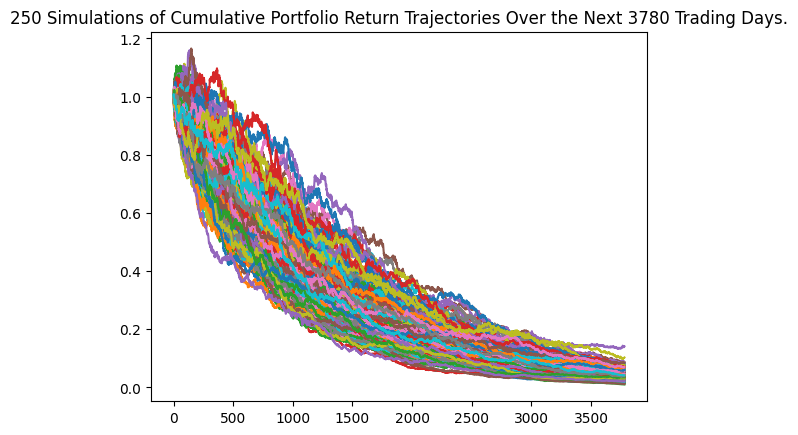

In [52]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
sim_15.plot_simulation()

In [37]:
# Plot simulation outcomes
plot_dist = sim_10.plot_simulation

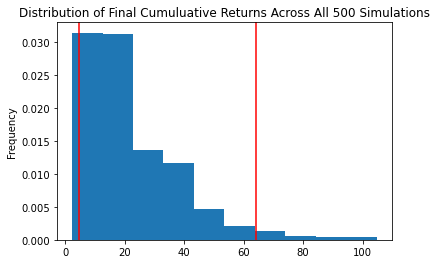

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean             22.130012
std              16.088798
min               2.342293
25%              10.465170
50%              17.476764
75%              29.550007
max             104.663919
95% CI Lower      4.779747
95% CI Upper     64.053604
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $95594.94 and $1281072.08


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
upper_ci = 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'ci_lower' is not defined

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


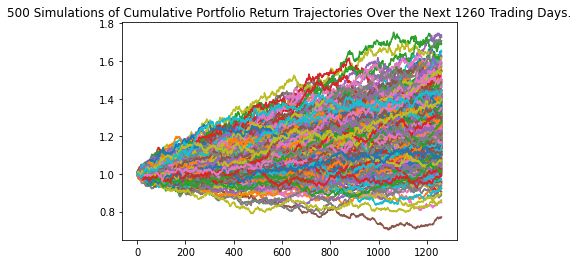

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

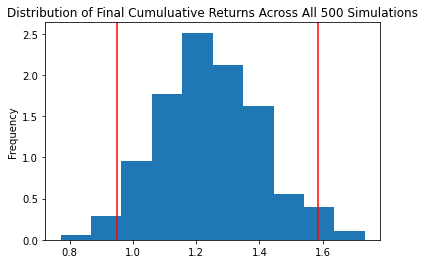

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


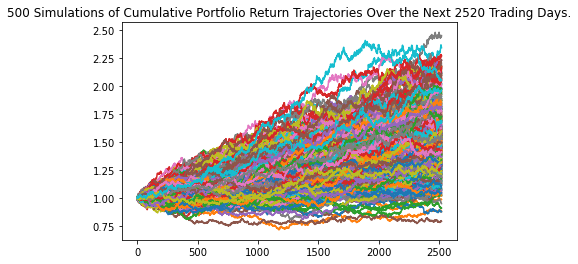

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

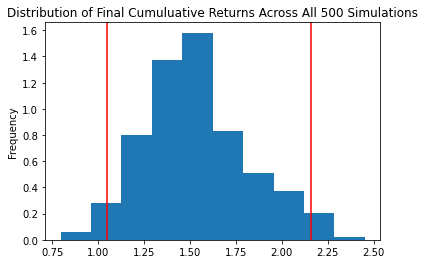

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [ ]:
# Set initial investment
principle = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
